Dataset:

https://raw.githubusercontent.com/amankharwal/Website-data/master/gold_price.csv

### Import Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
df = pd.read_csv("gold_price.csv", parse_dates=True, index_col='Date')
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


Now let’s do some data preparation to fit the data properly in our machine learning model:

In [2]:
df['Return'] = df['USD (PM)'].pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
train = df['2001':'2018']
test = df['2009']
# Create train and test sets for dependent and independent variables
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

### Using Linear Regression Model

Now as we have prepared the data to fit in a machine learning model for the task of gold price prediction, the next step is to choose a machine learning algorithm. For this task, I will use the Linear Regression algorithm:

In [3]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Now let’s plot the results of gold price prediction that we got from the linear regression algorithm:

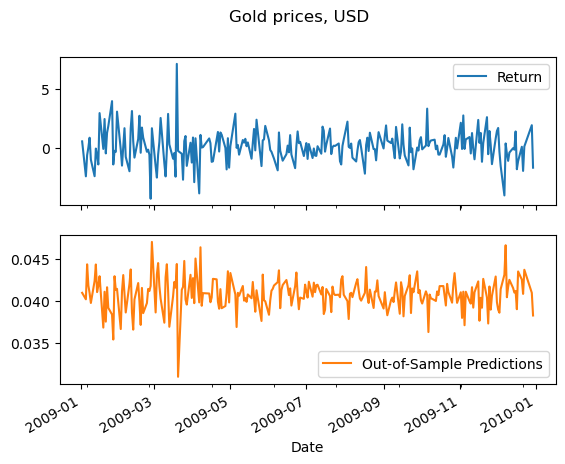

In [4]:
import matplotlib.pyplot as plt
out_of_sample_results = y_test.to_frame()
#Add a column of "out_of_sample" predictions to that dataframe:
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True,title='Gold prices, USD')
plt.show()